<a href="https://colab.research.google.com/github/FelipeAdrian/Orbit-s-Planets-around-the-Sun/blob/main/Felipe_Adrian_Barbosa_da_Silva_EP_de_EDO_estabilidade_dois_planetas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

''' criacao da classe das funcoes usadas'''
class Aceleracao:
    def __init__(self, G, Ms, Mb, Ma):
        self.G = G
        self.Ms = Ms
        self.Mb = Mb
        self.Ma = Ma

    def acc_a_x(self, p1, p2):
        func = -((self.G * self.Ms) / (pow(self.pos_unica(p1),3))) * p1[0] + ((self.G * self.Mb) / pow(self.pos_relativa(p1, p2),3)) * (p2[0] - p1[0])
        return func

    def acc_a_y(self, p1, p2):
        func = -((self.G * self.Ms) / (pow(self.pos_unica(p1),3))) * p1[1] + ((self.G * self.Mb) / pow(self.pos_relativa(p1, p2),3)) * (p2[1] - p1[1])
        return func

    def acc_a_z(self, p1, p2):
        func = -((self.G * self.Ms) / (pow(self.pos_unica(p1),3))) * p1[2] + ((self.G * self.Mb) / pow(self.pos_relativa(p1, p2),3)) * (p2[2] - p1[2])
        return func

    def acc_b_x(self, p1, p2):
        func = -((self.G * self.Ms) / (pow(self.pos_unica(p2),3))) * p2[0] + ((self.G * self.Ma) / pow(self.pos_relativa(p1, p2),3)) * (p2[0] - p1[0])
        return func

    def acc_b_y(self, p1, p2):
        func = -((self.G * self.Ms) / (pow(self.pos_unica(p2),3))) * p2[1] + ((self.G * self.Ma) / pow(self.pos_relativa(p1, p2),3)) * (p2[1] - p1[1])
        return func

    def acc_b_z(self, p1, p2):
        func = -((self.G * self.Ms) / (pow(self.pos_unica(p2),3))) * p2[2] + ((self.G * self.Ma) / pow(self.pos_relativa(p1, p2),3)) * (p2[2] - p1[2])
        return func


    def pos_relativa(self, p1, p2):
        func = np.sqrt(pow((p1[0] - p2[0]), 2) + pow(p1[1] - p2[1], 2) + pow(p1[2] - p2[2], 2))
        return func

    def pos_unica(self, p1):
        func = np.sqrt(pow(p1[0], 2) + pow(p1[1], 2) + pow(p1[2], 2))
        return func



G = 6.67e-11
Ms = 1.9889e30 # massa do sol
Mb = 6.39e23 # massa de marte
Ma = 5.9742e24 # massa da terra
seg_por_dia = 86400
dia = 680 #quantidades de dias
h = 3600 # passo de 1 hora, ou conforme sua escolha
n = (86400 * dia) / (h)

tempo = np.linspace(0,seg_por_dia*dia,int(n))
calcula = Aceleracao(G,Ms,Ma,Mb)

''' colocar as condicoes iniciais'''
# para posicao
x0a = 1.5e11 # distancia entre terra-sol
y0a = 0
z0a = 0
x0b = 0
y0b = 0
z0b = 2.27e11 # distancia entre marte-sol

vetor_planeta_1 = [(x0a,y0a,z0a)]
vetor_planeta_2 = [(x0b,y0b,z0b)]

#para velocidade. Sinta-se livre para mudar a velocidade nos eixos.
vx0a = 0
vy0a = 0  # velocidade inicial da terra, dado pela cons. de energia
vz0a = np.sqrt((G*Ms)/(calcula.pos_unica(vetor_planeta_1[0])))
vx0b = np.sqrt((G*Ms)/(calcula.pos_unica(vetor_planeta_2[0]))) # velocidade inicial de marte, dado pela cons. de energia
vy0b = 0
vz0b = 0



# Métodos




### 1.   Método de Euler explicíto:







Seja a edo $$\ddot{x}=g(x)$$método de Euler explícito é dado por
$$
  \left\{ \begin{array}{rcl} \dot{x} & = & y \\ \dot{y }& = & g(x) \end{array}
  \right.
$$

Então o Método de Euler explícito. A próxima função define a fórmula de iteração de Euler, que, explicitamente, será:
$$
  \left\{ \begin{array}{rcl}   x^{(k+1)} & = & x^{(k)} + h y^{(k)} \\   y^{(k+1)} & = & y^{(k)} + h g(x^{(k)})   \end{array}   \right.
$$

In [ ]:
xae = np.asarray([0.0] * len(tempo))
xae[0] = x0a
yae = np.asarray([0.0] * len(tempo))
yae[0] = y0a
zae = np.asarray([0.0] * len(tempo))
zae[0] = z0a
vxae = np.asarray([0.0] * len(tempo))
vxae[0] = vx0a
vyae = np.asarray([0.0] * len(tempo))
vyae[0] = vy0a
vzae = np.asarray([0.0] * len(tempo))
vzae[0] = vz0a

xbe = np.asarray([0.0] * len(tempo))
xbe[0] = x0b
ybe = np.asarray([0.0] * len(tempo))
ybe[0] = y0b
zbe = np.asarray([0.0] * len(tempo))
zbe[0] = z0b
vxbe = np.asarray([0.0] * len(tempo))
vxbe[0] = vx0b
vybe = np.asarray([0.0] * len(tempo))
vybe[0] = vy0b
vzbe = np.asarray([0.0] * len(tempo))
vzbe[0] = vz0b


vetor_posicao_a_euler = [(xae[0],yae[0],zae[0])]
vetor_posicao_b_euler= [(xbe[0],ybe[0],zbe[0])]

vetor_velocidade_a_euler = [(vxae[0],vyae[0],vzae[0])]
vetor_velocidade_b_euler = [(vxbe[0],vybe[0],vzbe[0])]

In [ ]:
''' método de euler explícito '''
k = 1
while k < len(tempo) :
    xae[k] = xae[k-1] + h*vxae[k-1]
    yae[k] = yae[k-1] + h*vyae[k-1]
    zae[k] = zae[k-1] + h*vzae[k-1]

    xbe[k] = xbe[k-1] + h*vxbe[k-1]
    ybe[k] = ybe[k-1] + h*vybe[k-1]
    zbe[k] = zbe[k-1] + h*vzbe[k-1]


    novo_vetor_posicao_a_euler = (xae[k],yae[k],zae[k])
    novo_vetor_posicao_b_euler = (xbe[k],ybe[k],zbe[k])

    vetor_posicao_a_euler.append(novo_vetor_posicao_a_euler)
    vetor_posicao_b_euler.append(novo_vetor_posicao_b_euler)

    vxae[k] = vxae[k-1] + h * calcula.acc_a_x(vetor_posicao_a_euler[k-1], vetor_posicao_b_euler[k-1])
    vyae[k] = vyae[k-1] + h*calcula.acc_a_y(vetor_posicao_a_euler[k-1], vetor_posicao_b_euler[k-1])
    vzae[k] = vzae[k-1] + h*calcula.acc_a_z(vetor_posicao_a_euler[k-1], vetor_posicao_b_euler[k-1])
    vxbe[k] = vxbe[k-1] + h*calcula.acc_b_x(vetor_posicao_a_euler[k-1], vetor_posicao_b_euler[k-1])
    vybe[k] = vybe[k-1] + h*calcula.acc_b_y(vetor_posicao_a_euler[k-1], vetor_posicao_b_euler[k-1])
    vzbe[k] = vzbe[k-1] + h*calcula.acc_b_z(vetor_posicao_a_euler[k-1], vetor_posicao_b_euler[k-1])

    novo_vetor_velocidade_a_euler = (vxae[k],vyae[k],vzae[k])
    novo_vetor_velocidade_b_euler = (vxbe[k],vybe[k],vzbe[k])

    vetor_velocidade_a_euler.append(novo_vetor_velocidade_a_euler)
    vetor_velocidade_b_euler.append(novo_vetor_velocidade_b_euler)

    k += 1

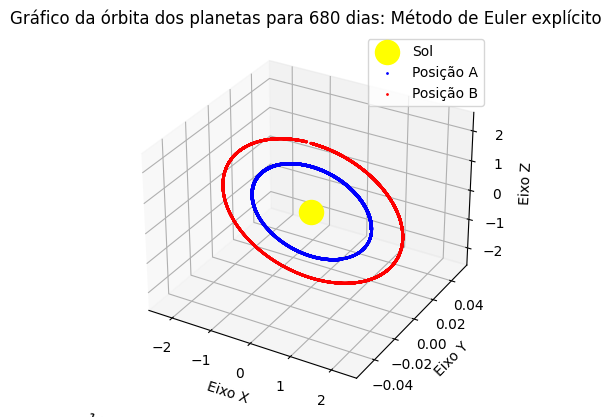

In [ ]:
x_coords_a_euler = [vetor[0] for vetor in vetor_posicao_a_euler]
y_coords_a_euler = [vetor[1] for vetor in vetor_posicao_a_euler]
z_coords_a_euler = [vetor[2] for vetor in vetor_posicao_a_euler]

x_coords_b_euler = [vetor[0] for vetor in vetor_posicao_b_euler]
y_coords_b_euler = [vetor[1] for vetor in vetor_posicao_b_euler]
z_coords_b_euler = [vetor[2] for vetor in vetor_posicao_b_euler]


fig2 = plt.figure()
ax_euler = fig2.add_subplot(111, projection='3d')

# coordenadas do centro do sistema solar (0, 0, 0)
x_center = 0
y_center = 0
z_center = 0

# Coordenadas do Sol
x_sol, y_sol, z_sol = x_center, y_center, z_center
ax_euler.scatter(x_sol, y_sol, z_sol, c='yellow', s=300, label='Sol')

# Plote os vetores de posição e velocidade no espaço 3D
ax_euler.scatter(x_coords_a_euler, y_coords_a_euler, z_coords_a_euler, label='Posição A', c='b', marker='o', s=1)
ax_euler.scatter(x_coords_b_euler, y_coords_b_euler, z_coords_b_euler, label='Posição B', c='r', marker='o', s=1)



ax_euler.set_xlabel('Eixo X')
ax_euler.set_ylabel('Eixo Y')
ax_euler.set_zlabel('Eixo Z')

''' Exibindo o gráfico '''
plt.title ("Gráfico da órbita dos planetas para %d dias: Método de Euler explícito" %(dia))
plt.legend()
plt.show()

### 1.   Método de Velocity-Vernet:



Seja a edo dada pela segunda Lei de Newton $$m \cdot\vec{a} = \sum_{i=1} \vec{F_i}$$
o método de Velocity Vernet, deduzido e, https://repositorio.ufscar.br/bitstream/handle/ufscar/4896/TeseRCMTO.pdf?sequence=1 página 101, é dado por:

$$
  \left\{ \begin{array}{rcl}   x^{(k+1)} & = & x^{(k)} + h y^{(k)}  + \frac{h^2}{2} \frac{F^{(k)}}{m}\\   y^{(k+1)} & = & y^{(k)} + \frac{h}{2} \cdot \left(\ F^{(k)} + F^{(k+1)} \right )  \end{array}   \right.
$$

In [ ]:
''' definindo coordenadas do método velocity'''

xa = np.asarray([0.0] * len(tempo))
xa[0] = x0a
ya = np.asarray([0.0] * len(tempo))
ya[0] = y0a
za = np.asarray([0.0] * len(tempo))
za[0] = z0a
vxa = np.asarray([0.0] * len(tempo))
vxa[0] = vx0a
vya = np.asarray([0.0] * len(tempo))
vya[0] = vy0a
vza = np.asarray([0.0] * len(tempo))
vza[0] = vz0a

xb = np.asarray([0.0] * len(tempo))
xb[0] = x0b
yb = np.asarray([0.0] * len(tempo))
yb[0] = y0b
zb = np.asarray([0.0] * len(tempo))
zb[0] = z0b
vxb = np.asarray([0.0] * len(tempo))
vxb[0] = vx0b
vyb = np.asarray([0.0] * len(tempo))
vyb[0] = vy0b
vzb = np.asarray([0.0] * len(tempo))
vzb[0] = vz0b

vetor_posicao_a = [(xa[0],ya[0],za[0])]
vetor_posicao_b = [(xb[0],yb[0],zb[0])]

vetor_velocidade_a = [(vxa[0],vya[0],vza[0])]
vetor_velocidade_b = [(vxb[0],vyb[0],vzb[0])]


In [ ]:
k = 1
while k < len(tempo):

    ''' forca anterior'''
    Forca_x_a_ant = calcula.acc_a_x(vetor_posicao_a[k-1], vetor_posicao_b[k-1])
    Forca_y_a_ant = calcula.acc_a_y(vetor_posicao_a[k-1], vetor_posicao_b[k-1])
    Forca_z_a_ant = calcula.acc_a_z(vetor_posicao_a[k-1], vetor_posicao_b[k-1])
    Forca_x_b_ant = calcula.acc_b_x(vetor_posicao_a[k-1], vetor_posicao_b[k-1])
    Forca_y_b_ant = calcula.acc_b_y(vetor_posicao_a[k-1], vetor_posicao_b[k-1])
    Forca_z_b_ant = calcula.acc_b_z(vetor_posicao_a[k-1], vetor_posicao_b[k-1])

    # Atualize a posição de a
    xa[k] = xa[k-1] + h*vxa[k-1] + ((pow(h,2))/(2*Ma)) * Forca_x_a_ant
    ya[k] = ya[k-1] + h*vya[k-1] + ((pow(h,2))/(2*Ma)) * Forca_y_a_ant
    za[k] = za[k-1] + h*vza[k-1] + ((pow(h,2))/(2*Ma)) * Forca_z_a_ant

    # Atualize a posição de b
    xb[k] = xb[k-1] + h*vxb[k-1] + ((pow(h,2))/(2*Mb)) * Forca_x_b_ant
    yb[k] = yb[k-1] + h*vyb[k-1] + ((pow(h,2))/(2*Mb)) * Forca_y_b_ant
    zb[k] = zb[k-1] + h*vzb[k-1] + ((pow(h,2))/(2*Mb)) * Forca_z_b_ant

    novo_vetor_posicao_a = (xa[k],ya[k],za[k])
    novo_vetor_posicao_b = (xb[k],yb[k],zb[k])

    vetor_posicao_a.append(novo_vetor_posicao_a)
    vetor_posicao_b.append(novo_vetor_posicao_b)

    ''' forca atual'''
    Forca_x_a = calcula.acc_a_x(vetor_posicao_a[k], vetor_posicao_b[k])
    Forca_y_a = calcula.acc_a_y(vetor_posicao_a[k], vetor_posicao_b[k])
    Forca_z_a = calcula.acc_a_z(vetor_posicao_a[k], vetor_posicao_b[k])
    Forca_x_b = calcula.acc_b_x(vetor_posicao_a[k], vetor_posicao_b[k])
    Forca_y_b = calcula.acc_b_y(vetor_posicao_a[k], vetor_posicao_b[k])
    Forca_z_b = calcula.acc_b_z(vetor_posicao_a[k], vetor_posicao_b[k])

    ''' com a forca, tem-se a velocidade. Assim'''
    #atualizacao da velocidade de a
    vxa[k] = vxa[k-1] + (h/(2)) * (Forca_x_a + Forca_x_a_ant)
    vya[k] = vya[k-1] + (h/(2)) * (Forca_y_a + Forca_y_a_ant)
    vza[k] = vza[k-1] + (h/(2)) * (Forca_z_a + Forca_z_a_ant)
    #atualizacao da velocidade de b
    vxb[k] = vxb[k-1] + (h/(2)) * (Forca_x_b + Forca_x_b_ant)
    vyb[k] = vyb[k-1] + (h/(2)) * (Forca_y_b + Forca_y_b_ant)
    vzb[k] = vzb[k-1] + (h/(2)) * (Forca_z_b + Forca_z_b_ant)

    novo_vetor_velocidade_a = (vxa[k],vya[k],vza[k])
    novo_vetor_velocidade_b = (vxb[k],vyb[k],vzb[k])

    vetor_velocidade_a.append(novo_vetor_velocidade_a)
    vetor_velocidade_b.append(novo_vetor_velocidade_b)

    k += 1

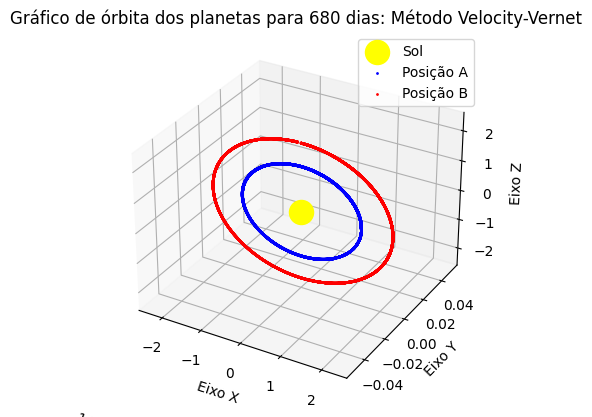

In [ ]:
''' plot do método velocity Vernet '''

x_coords_a = [vetor[0] for vetor in vetor_posicao_a]
y_coords_a = [vetor[1] for vetor in vetor_posicao_a]
z_coords_a = [vetor[2] for vetor in vetor_posicao_a]

x_coords_b = [vetor[0] for vetor in vetor_posicao_b]
y_coords_b = [vetor[1] for vetor in vetor_posicao_b]
z_coords_b = [vetor[2] for vetor in vetor_posicao_b]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# coordenadas do centro do sistema solar (0, 0, 0)
x_center = 0
y_center = 0
z_center = 0

# Coordenadas do Sol
x_sol, y_sol, z_sol = x_center, y_center, z_center
ax.scatter(x_sol, y_sol, z_sol, c='yellow', s=300, label='Sol')

# Plote os vetores de posição e velocidade no espaço 3D
ax.scatter(x_coords_a, y_coords_a, z_coords_a, label='Posição A', c='b', marker='o', s=1)
ax.scatter(x_coords_b, y_coords_b, z_coords_b, label='Posição B', c='r', marker='o', s=1)



ax.set_xlabel('Eixo X')
ax.set_ylabel('Eixo Y')
ax.set_zlabel('Eixo Z')

''' Exibindo o gráfico '''
plt.title ("Gráfico de órbita dos planetas para %d dias: Método Velocity-Vernet" %(dia))
plt.legend()
plt.show()

### Apêndice

### Critério de estabilidade segundo Liapunov

Referência: http://www.cpdee.ufmg.br/~torres/wp-content/uploads/2018/02/Estabilidade_Lyapunov.pdf

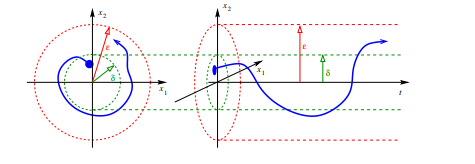

Dado $$ϵ>0, ∃δ(x,t_0), \quad tq ||x(t_0)|| < δ \to ||x(t)||<ϵ$$

 resumidamente, se um sistema circunvizinha uma região de equilibrio estável, e dado um epsilon que delimitada o raio e esta solução permanece na bolinha delimitada, podemos dizer este sistema estará, para sempre, tão próximos ao ponto de equilíbrio quanto quisermos. Portanto, se esta imposição for verdadeira, este sistema é estável.

Text(0, 0.5, 'Velocidade (dx/dt = v)')

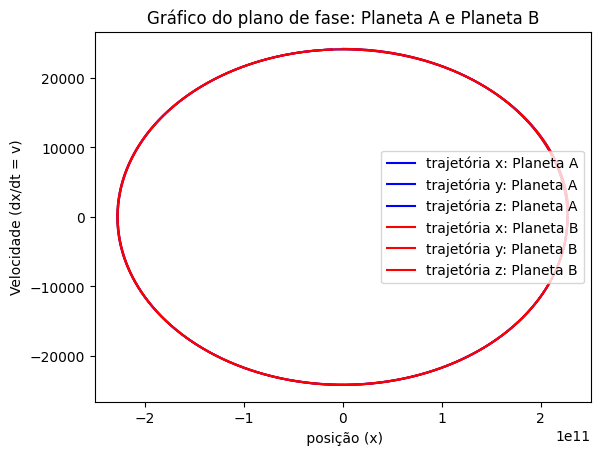

In [ ]:
''' teste do plano de fase '''

plan_a_x = [vetor[0] for vetor in vetor_posicao_b_euler]
plan_a_y = [vetor[1] for vetor in vetor_posicao_b_euler]
plan_a_z = [vetor[2] for vetor in vetor_posicao_b_euler]

plan_va_x = [vetor[0] for vetor in vetor_velocidade_b_euler]
plan_va_y = [vetor[1] for vetor in vetor_velocidade_b_euler]
plan_va_z = [vetor[2] for vetor in vetor_velocidade_b_euler]


plan_b_x = [vetor[0] for vetor in vetor_posicao_b_euler]
plan_b_y = [vetor[1] for vetor in vetor_posicao_b_euler]
plan_b_z = [vetor[2] for vetor in vetor_posicao_b_euler]

plan_vb_x = [vetor[0] for vetor in vetor_velocidade_b_euler]
plan_vb_y = [vetor[1] for vetor in vetor_velocidade_b_euler]
plan_vb_z = [vetor[2] for vetor in vetor_velocidade_b_euler]


plt.plot(plan_a_x,plan_va_x, label = 'trajetória x: Planeta A', c = 'b')
plt.plot(plan_a_y,plan_va_y, label = 'trajetória y: Planeta A', c = 'b')
plt.plot(plan_a_z,plan_va_z, label = 'trajetória z: Planeta A', c = 'b')
plt.plot(plan_b_x,plan_vb_x, label = 'trajetória x: Planeta B', c = 'r')
plt.plot(plan_b_y,plan_vb_y, label = 'trajetória y: Planeta B', c = 'r')
plt.plot(plan_b_z,plan_vb_z, label = 'trajetória z: Planeta B', c = 'r')

''' pelo critério de estabilidade segundo liapunov, esse sistema é estável.'''

plt.legend()
plt.title('Gráfico do plano de fase: Planeta A e Planeta B')
plt.xlabel (' posição (x)')
plt.ylabel ('Velocidade (dx/dt = v)')

 Note que dado um $ϵ>0$ que delimita um raio de uma bolinha, o caminho da solução permanece dentro desta bolinha. Logo, pode-se afirmar este sistema é estável.

 Teste outras velocidade e posições, e veja se ainda permanece estável. Multiplique a velocidade inicial e veja que há um $ϵ>0$ tal que a curva ficará dentro da bolinha.